In [134]:
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

from transformers import AutoImageProcessor, ResNetForImageClassification
import torch
from datasets import load_dataset
import copy
import os

from collections import defaultdict
from itertools import combinations
import math
import pickle
import seaborn as sns



In [3]:
dataset = load_dataset('cifar100', split='test')

Found cached dataset cifar100 (/Users/andrejerkelens/.cache/huggingface/datasets/cifar100/cifar100/1.0.0/f365c8b725c23e8f0f8d725c3641234d9331cd2f62919d1381d1baa5b3ba3142)


In [224]:
INT_MAP['interactions_cifar_test_14.pickle']['masks']

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 150,
  'bbox': [4, 2, 22, 8],
  'predicted_iou': 0.9882684350013733,
  'point_coords': [[18.5, 8.5]],
  'stability_score': 0.9673202633857727,
  'crop_box': [0, 0, 32, 32],
  'edges': [(2, 11),
   (2, 12),
   (2, 13),
   (2, 14),
   (2, 15),
   (2, 16),
   (2, 17),
   (2, 18),
   (2, 19),
   (3, 10),
   (3, 20),
   (4, 9),
   (4, 21),
   (5, 8),
   (5, 22),
   (6, 7),
   (6, 23),
   (7, 6),
   (7, 24),
   (8, 5),
   (8, 25),
   (9, 4),
   (9, 26),
   (10, 4),
   (10, 5),
   (10, 6),
   (10, 7),
   (10, 8),
   (10, 9),
   (10, 10),
   (10, 11),
   (10, 12),
   (10, 13),
   (10, 14),
   (10, 15),
   (10, 

In [2]:
def show_img(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [3]:
sam = sam_model_registry["default"](checkpoint="sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)
mask_generator = SamAutomaticMaskGenerator(sam)

In [6]:
cifar0 = dataset[0]['img']

In [7]:
cv_image = np.array(cifar0)

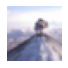

In [8]:
plt.figure(figsize=(1,1))
plt.imshow(cv_image)
plt.axis("off")
plt.show()

In [10]:
masks = mask_generator.generate(cv_image)

In [11]:
dataset[0]['coarse_label']

10

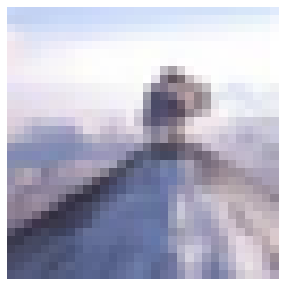

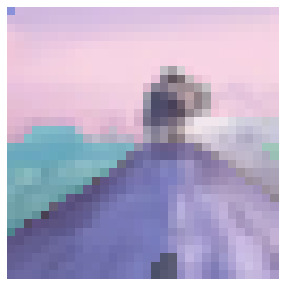

In [12]:
plt.figure(figsize=(5,5))
plt.imshow(cv_image)
plt.axis('off')
plt.show();

plt.figure(figsize=(5,5))
plt.imshow(cv_image)
show_img(masks)
plt.axis('off')
plt.show();

In [13]:
import pickle

In [14]:
with open("output/interactions_cifar_test_0.pickle", "rb") as f:
    cifar0_interactions = pickle.load(f)

In [4]:
def find_edges(matrix):

    rows, cols = len(matrix), len(matrix[0])
    edges = []

    for i in range(rows):
        for j in range(cols):
            if matrix[i][j]:
                neighbors = []

                # Check neighboring cells
                if i - 1 >= 0:
                    neighbors.append(matrix[i - 1][j])
                if i + 1 < rows:
                    neighbors.append(matrix[i + 1][j])
                if j - 1 >= 0:
                    neighbors.append(matrix[i][j - 1])
                if j + 1 < cols:
                    neighbors.append(matrix[i][j + 1])

                # Check if there's at least one True and one False among the neighbors
                if True in neighbors and False in neighbors:
                    edges.append((i, j))

    return edges

In [19]:
cifar0_edges = []
for mask in masks:
    mask['edges'] = find_edges(mask['segmentation'])
    cifar0_edges.append(mask['edges'])

cifar0_edges = [e for m in cifar0_edges for e in m]

In [124]:
matching_keys = []

#TODO: Fix the keys in the drop code
for key in cifar0_interactions:
    for edge in cifar0_edges:
        if edge in key:
            matching_keys.append(key)

In [21]:
cifar0_avg_int = np.array(list(cifar0_interactions.values())).mean()
cifar0_edge_avg_int = np.array([cifar0_interactions[key] for key in matching_keys])

In [22]:
cifar0_avg_int

0.2379601

In [23]:
cifar0_edge_avg_int.mean()

0.18205738

In [27]:
edges = find_edges(mask['segmentation'])

In [28]:
for mask in masks:
    print(mask)

{'segmentation': array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 406, 'bbox': [0, 0, 31, 15], 'predicted_iou': 1.0037802457809448, 'point_coords': [[0.5, 14.5]], 'stability_score': 0.9685230255126953, 'crop_box': [0, 0, 32, 32], 'edges': [(6, 18), (6, 19), (6, 20), (7, 17), (7, 21), (8, 17), (8, 22), (8, 23), (9, 16), (9, 24), (10, 15), (10, 24), (11, 15), (11, 24), (12, 15), (12, 24), (12, 25), (12, 26), (12, 27), (12, 28), (12, 29), (12, 30), (12, 31), (13, 3), (13, 4), (13, 5), (13, 6), (13, 7), (13, 8), (13, 12), (13, 15), (14, 2), (14, 9), (14, 10), (14, 11), (14, 13), (14, 14), (14, 15), (15, 0), (15, 1), (15, 15)]}
{'segmentation': array([[False, False, False, ..., False, Fa

In [29]:
cifar0_interactions[((0,0),(0,1))]

0.3422062

In [17]:
def get_neighbors(rows, cols, n_pixels):

    directions = [
        (-1, 0),  # up
        (1, 0),  # down
        (0, -1),  # left
        (0, 1),  # right
        (-1, -1),  # upper left diagonal
        (-1, 1),  # upper right diagonal
        (1, -1),  # lower left diagonal
        (1, 1)   # lower right diagonal
    ]

    result = {}

    for i in range(rows):
        for j in range(cols):
            neighbors = []
            for dx, dy in directions:
                for distance in range(1, n_pixels + 1):
                    x, y = i + dx * distance, j + dy * distance
                    if 0 <= x < rows and 0 <= y < cols:
                        neighbors.append((x, y))
            result[(i, j)] = neighbors

    return result

In [60]:
def get_surrounding_interactions(H, W, neighbors, interactions):
    surrounding_interactions = {}
    surrounding_matrix = np.empty((H,W))
    for i in range(H):
        for j in range(W):
            pix_val = (i,j)
            neigh = neighbors[pix_val]
            arr = []
            for n in neigh:
                pair = (pix_val, n)
                if pair in interactions:
                    arr.append(interactions[pair])
                elif pair[::-1] in interactions:
                    arr.append(interactions[pair[::-1]])
                else:
                    raise ValueError("Pair not in interactions") 
            avg_int = np.mean(arr)
            surrounding_matrix[i,j] = avg_int
            surrounding_interactions[pix_val] = avg_int

    return surrounding_matrix

In [19]:
def get_heatmap(np_img, surrounding_matrix, neighbor_size: int):

    reg_fig = plt.figure(figsize=(8,8))
    plt.imshow(np_img)
    plt.title("Plain Image")
    # plt.close()


    heat_fig = plt.figure(figsize=(8,8))
    heatmap = plt.pcolor(surrounding_matrix[::-1], cmap='hot')
    plt.colorbar(heatmap)
    plt.title(f"Avg. Interaction with Neighboring n={neighbor_size} pixels")
    # plt.close()

    return reg_fig, heat_fig


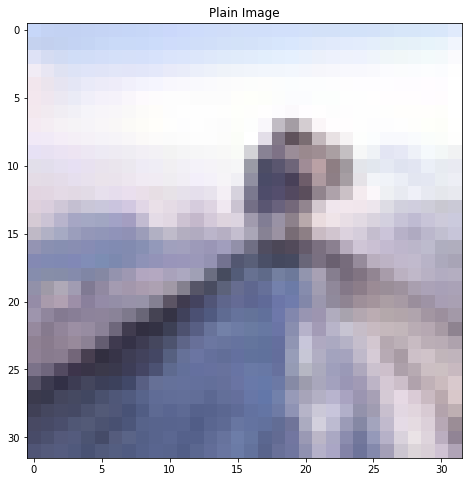

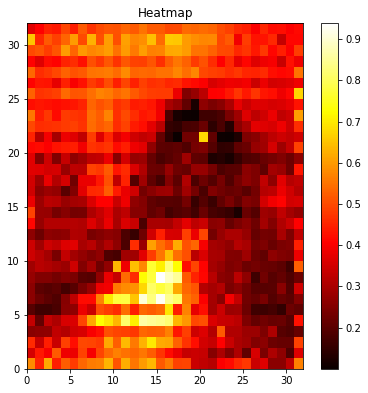

In [116]:
plt.figure(figsize=(8,8))
plt.imshow(cv_image)
plt.title("Plain Image")
plt.savefig(os.path.join(png_dir,'cifar0_plain_img.png'), bbox_inches='tight', dpi=300)
plt.show();

plt.figure(figsize=(8,8))
plt.imshow(cv_image)
show_img(masks)
plt.title("Masked Image")
plt.savefig(os.path.join(png_dir,'cifar0_masked_img.png'), bbox_inches='tight', dpi=300)
plt.close();


plt.figure(figsize=(8,8))
heatmap = plt.pcolor(surrounding_matrix[::-1], cmap='hot')
plt.colorbar(heatmap)
plt.title("Heatmap")
plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
plt.savefig(os.path.join(png_dir,'cifar0_imap_img.png'), bbox_inches='tight', dpi=300)
plt.show()

**General Trend Visualization:**
1. sample a target pixel on an object edge and measure interaction with a sample of **some pixels** on the same edge and pixels off that edge, but make them equal distances by either manhattan distance or euclidean from the target pixel
2. also sample target pixels that are internal to a particular object, and measure interactions with a sample of pixels that are either in the same object or outside the boundary
3. plot, with x axis as euclidean distance, the different trendlines for pixels that share the same edge and pixels that either fall inside that object or outside the object that it marks the edge of (3 different trendlines)
4. plot 2 different trend lines for pixels that are in the same object and pixels that are off of that object

In [57]:
mask

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'area': 8,
 'bbox': [17, 29, 2, 2],
 'predicted_iou': 0.9089388251304626,
 'point_coords': [[19.5, 29.5]],
 'stability_score': 1.0,
 'crop_box': [0, 0, 32, 32],
 'edges': [(29, 18), (29, 19), (30, 17), (30, 19), (31, 17), (31, 19)]}

In [58]:
mask['edges']

[(29, 18), (29, 19), (30, 17), (30, 19), (31, 17), (31, 19)]

In [155]:
mask['edges']

[(10, 18), (11, 18), (11, 19)]

In [268]:
def manhattan_distance(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def euclidean_distance(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)


def get_pixels_at_distance(N,M,ref_point,all_edges, dist, dist_type='manh'):
    result = []
     
    for i in range(N):
        for j in range(M):
            if dist_type == 'manh':
                if manhattan_distance(ref_point, (i, j)) == dist and (i,j) not in all_edges:
                    result.append((i, j))
            elif dist_type == 'eucl':
                if euclidean_distance(ref_point, (i,j)) == dist and (i,j) not in all_edges:
                    result.append((i,j))
    return result


def get_distance_interactions(masks, background, interactions: dict, img: np.array, dist_type: str):

    disteractions = {}

    # TODO: Use this - external edge
    _all_edges = []
    for mask in masks:
        _all_edges.extend(mask['edges'])

    for mask in masks:
        m_edges = mask['edges']
        all_combs = list(combinations(m_edges, 2))

        for p0, p1 in all_combs:
            if dist_type == 'manh':
                dist = manhattan_distance(p0, p1)
            elif dist_type == 'eucl':
                dist = euclidean_distance(p0, p1)
            else:
                raise ValueError("dist_type must be one of {'manh', 'eucl'}")

            p_pair = ((p0),(p1))
            if p_pair in interactions:
                edge_interaction = interactions[p_pair]
            else:
                edge_interaction = interactions[p_pair[::-1]]
            
            if dist not in disteractions:
                disteractions[dist] = {}
                disteractions[dist]["edge"] = []
                disteractions[dist]["non_edge"] = {}
                disteractions[dist]["non_edge"]["in_object"] = []
                disteractions[dist]["non_edge"]["background"] = []
                disteractions[dist]["non_edge"]["not_in_object"] = []
                disteractions[dist]["non_edge"]["edge"] = []
                
            disteractions[dist]["edge"].append(edge_interaction)

            if len(img.shape) == 3:
                n,m = img.shape[:-1]
            elif len(img.shape) == 2:
                n,m = img.shape

            outside_edge_interaction = get_pixels_at_distance(n,m, p0, m_edges, dist, dist_type=dist_type)

            for non_edge in outside_edge_interaction:
                p_pair = ((p0),(non_edge))
                if p_pair in interactions:
                    ne_interaction = interactions[p_pair]
                else:
                    ne_interaction = interactions[p_pair[::-1]]
                
                if mask['segmentation'][non_edge]:
                    disteractions[dist]["non_edge"]["in_object"].append(ne_interaction)
                elif background[non_edge]:
                    disteractions[dist]["non_edge"]["background"].append(ne_interaction)
                elif non_edge in _all_edges:
                    disteractions[dist]["non_edge"]["edge"].append(ne_interaction)
                else:
                    disteractions[dist]["non_edge"]["not_in_object"].append(ne_interaction)

    return disteractions

In [95]:
for distances in manhattan_interactions:
        
        print(f"Manhattan Distance: {distances}")
        print(f"Average Interaction on Edges: {np.mean(manhattan_interactions[distances]['edge'])}")
        print(f"Average Interaction Not-on Edges: {np.mean(manhattan_interactions[distances]['non_edge'])}")


Manhattan Distance: 1
Average Interaction on Edges: 0.3897019326686859
Average Interaction Not-on Edges: 0.3739204406738281
Manhattan Distance: 2
Average Interaction on Edges: 0.339525431394577
Average Interaction Not-on Edges: 0.3336658477783203
Manhattan Distance: 4
Average Interaction on Edges: 0.24527695775032043
Average Interaction Not-on Edges: 0.25480255484580994
Manhattan Distance: 3
Average Interaction on Edges: 0.25818076729774475
Average Interaction Not-on Edges: 0.28533613681793213
Manhattan Distance: 6
Average Interaction on Edges: 0.19591008126735687
Average Interaction Not-on Edges: 0.22239097952842712
Manhattan Distance: 7
Average Interaction on Edges: 0.18336713314056396
Average Interaction Not-on Edges: 0.21831680834293365
Manhattan Distance: 5
Average Interaction on Edges: 0.21228022873401642
Average Interaction Not-on Edges: 0.23042480647563934
Manhattan Distance: 9
Average Interaction on Edges: 0.16656170785427094
Average Interaction Not-on Edges: 0.223063856363296

In [96]:

for distances in euclidean_interactions:
        
        print(f"Euclidean Distance: {distances}")
        print(f"Average Interaction on Edges: {np.mean(euclidean_interactions[distances]['edge'])}")
        print(f"Average Interaction Not-on Edges: {np.mean(euclidean_interactions[distances]['non_edge'])}")

Euclidean Distance: 1
Average Interaction on Edges: 0.3897019326686859
Average Interaction Not-on Edges: 0.3739204406738281
Euclidean Distance: 2
Average Interaction on Edges: 0.339525431394577
Average Interaction Not-on Edges: 0.33623018860816956
Euclidean Distance: 4
Average Interaction on Edges: 0.24527695775032043
Average Interaction Not-on Edges: 0.2621069848537445
Euclidean Distance: 3
Average Interaction on Edges: 0.25818076729774475
Average Interaction Not-on Edges: 0.29336118698120117
Euclidean Distance: 6
Average Interaction on Edges: 0.19591008126735687
Average Interaction Not-on Edges: 0.22029586136341095
Euclidean Distance: 7
Average Interaction on Edges: 0.18336713314056396
Average Interaction Not-on Edges: 0.21225248277187347
Euclidean Distance: 5
Average Interaction on Edges: 0.21228022873401642
Average Interaction Not-on Edges: 0.23085373640060425
Euclidean Distance: 9
Average Interaction on Edges: 0.16656170785427094
Average Interaction Not-on Edges: 0.225668162107467

### For Series of Images

(rather than one off analysis)

In [79]:
IMG_DIR = 'output/mnist10_out/'
IMG_SET = 'mnist'

In [80]:
from time import perf_counter

Found cached dataset mnist (/Users/andrejerkelens/.cache/huggingface/datasets/mnist/mnist/1.0.0/9d494b7f466d6931c64fb39d58bb1249a4d85c9eb9865d9bc20960b999e2a332)


Begin image: 0
Mask generation time: 36.81884362499113 seconds
Edge finder time: 0.002263999980641529 seconds
Matching pixels time: 1.850884874991607 seconds
Edge interaction calculator time: 0.1212119999981951 seconds
Neighbor calculation time: 0.02274908300023526 seconds
Surrounding interactions time: 0.010384583001723513 seconds
Heatmap generation time: 0.018071665981551632 seconds
Distance interaction calculation time: 0.938716167001985 seconds
Begin image: 1
Mask generation time: 35.78786070799106 seconds
Edge finder time: 0.0036885419976897538 seconds
Matching pixels time: 0.9054514159797691 seconds
Edge interaction calculator time: 0.10583337498246692 seconds
Neighbor calculation time: 0.01500237500295043 seconds
Surrounding interactions time: 0.011022041988326237 seconds
Heatmap generation time: 0.018491625000024214 seconds
Distance interaction calculation time: 0.0943910829955712 seconds
Begin image: 2
Mask generation time: 35.39646737501607 seconds
Edge finder time: 0.0029168

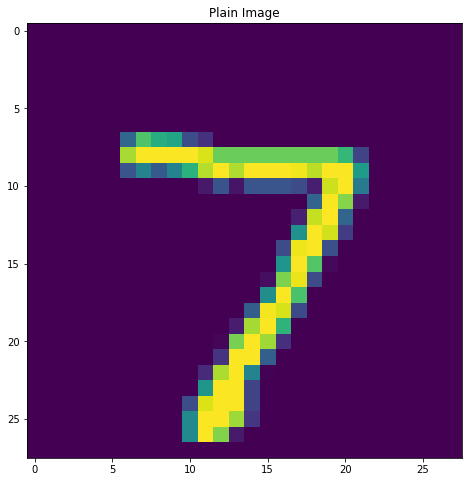

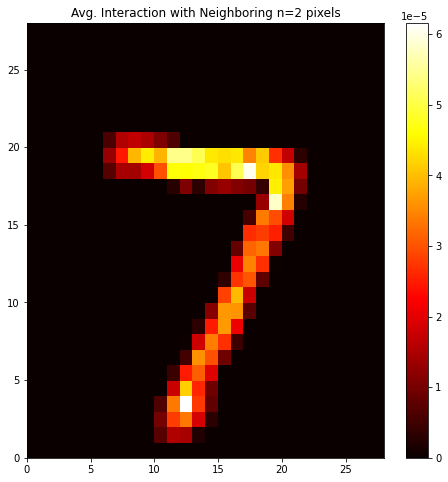

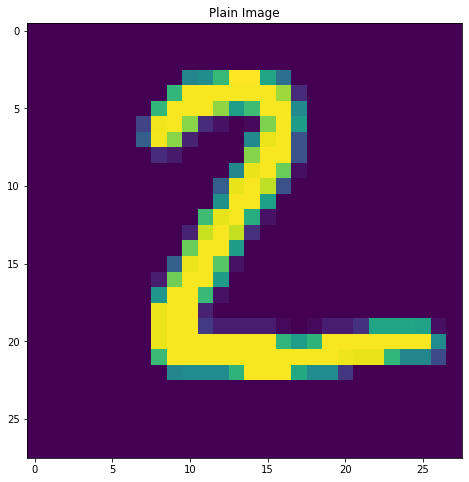

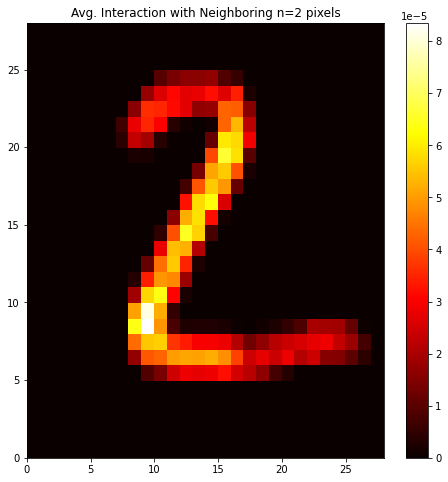

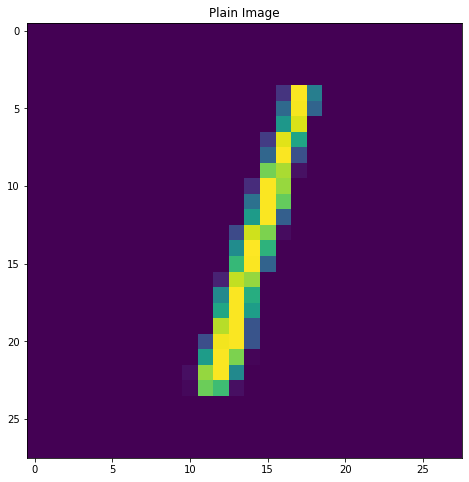

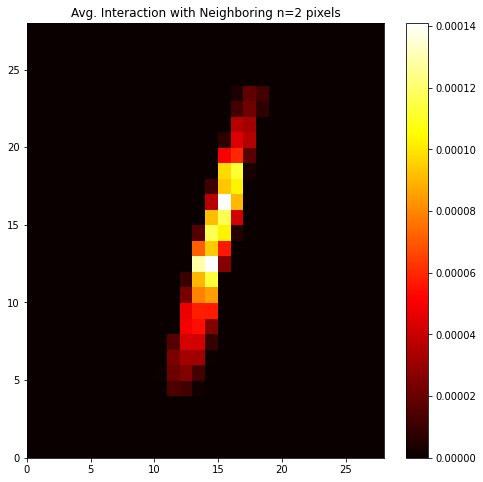

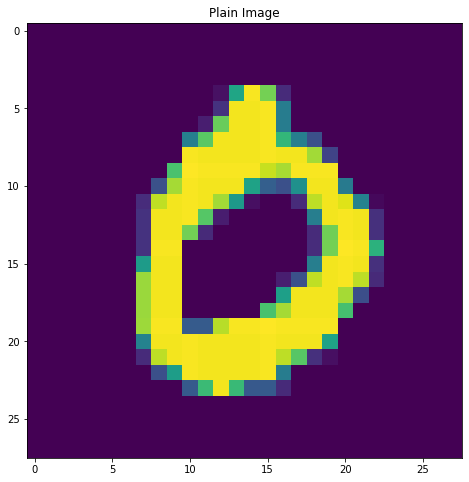

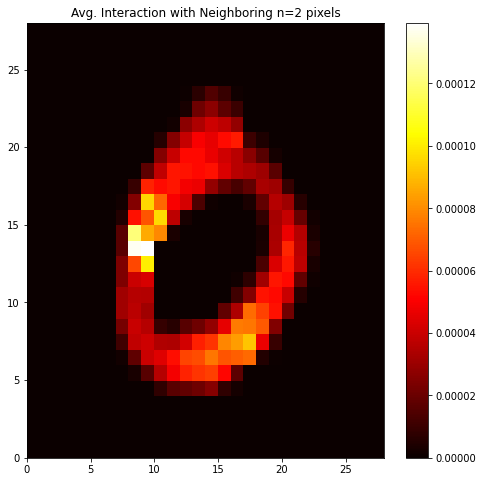

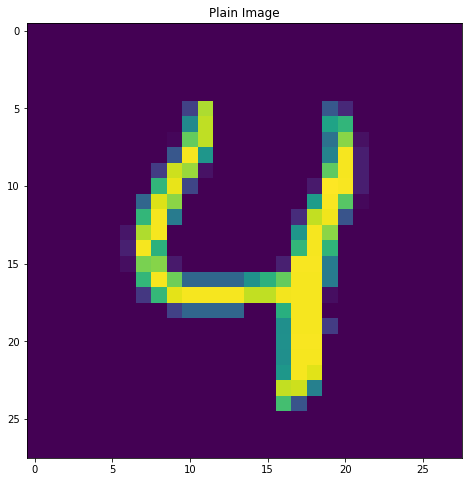

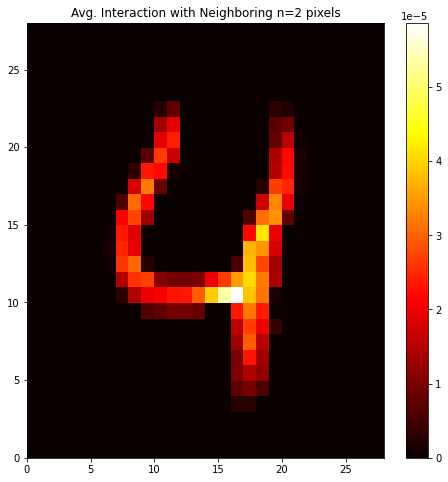

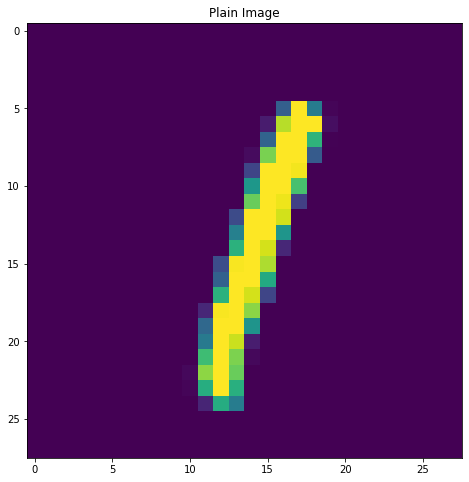

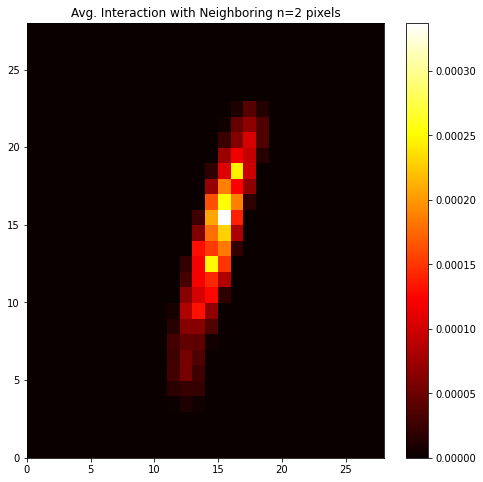

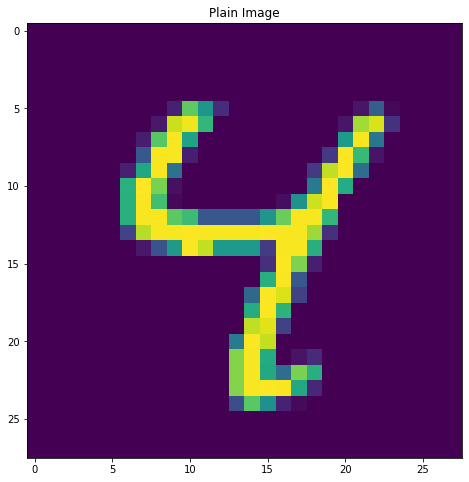

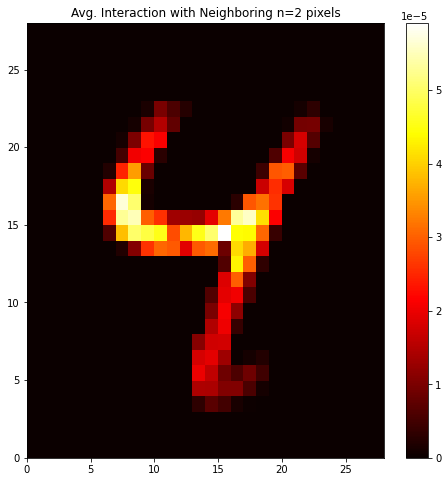

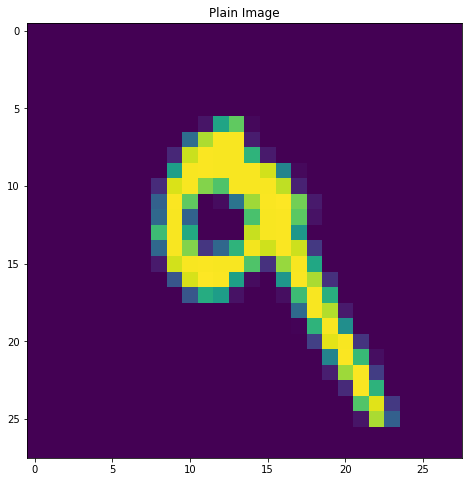

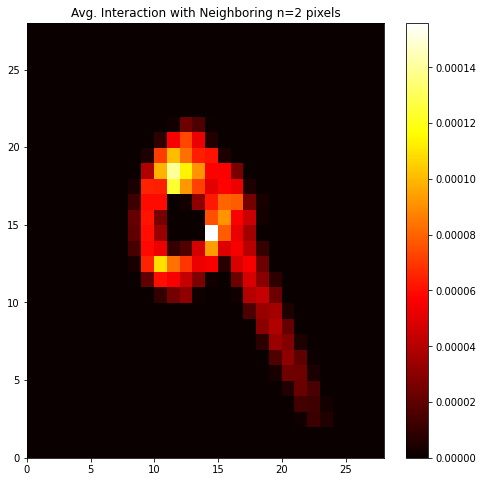

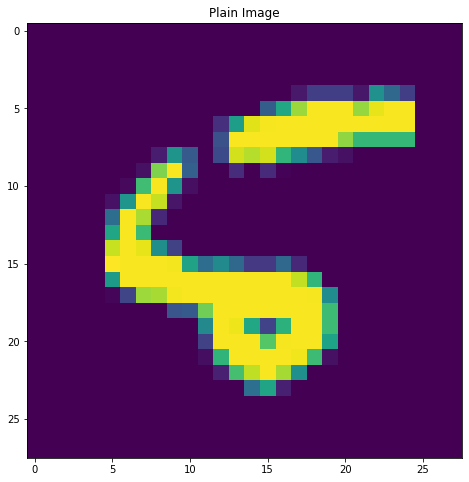

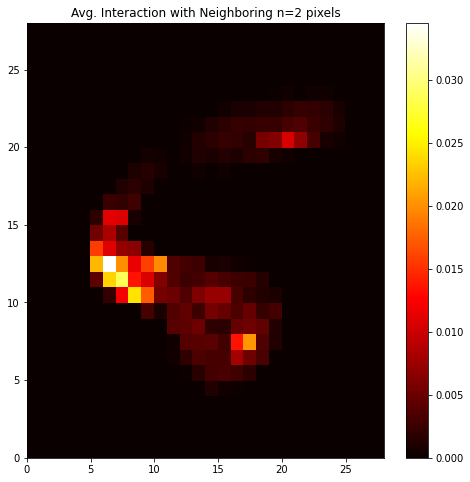

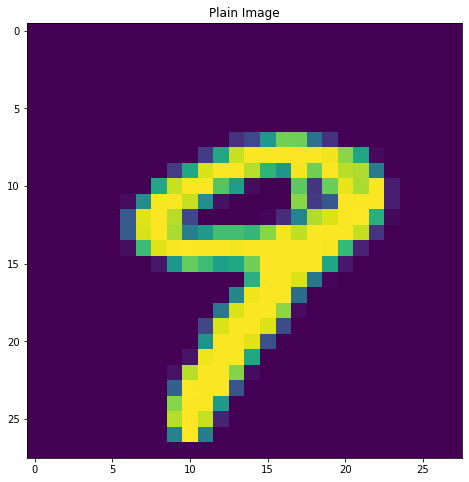

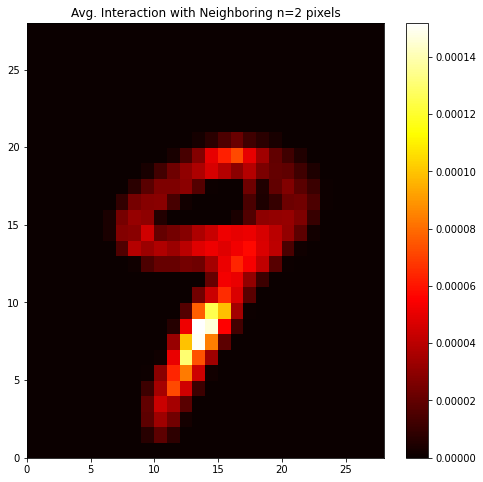

In [81]:
# Load the interactions from the pickle file
# Images are presumed to be in order, introduce more complex mapping if needed
INT_MAP = {}
NEIGHBORHOOD_SIZE = 2

for pickint in sorted(os.listdir(IMG_DIR)):
    INT_MAP[pickint] = {}
    path = os.path.join(IMG_DIR, pickint)
    with open(path , "rb") as f:
        INT_MAP[pickint]['interactions'] = pickle.load(f)
        

if IMG_SET == 'mnist':
    dataset = load_dataset('mnist', split='test')
    H,W = np.array(dataset[0]["image"]).shape

for idx, key in enumerate(INT_MAP):
    INT_MAP[key]['image'] = np.array(dataset[idx]["image"])
    print(f"Begin image: {idx}")
    step = perf_counter()
    if IMG_SET == "mnist":
        INT_MAP[key]['masks'] = mask_generator.generate(cv2.cvtColor(INT_MAP[key]['image'], cv2.COLOR_GRAY2RGB))
    else:
        INT_MAP[key]["masks"] = mask_generator.generate(INT_MAP[key]["image"])

    # Set Backgrounds
    bg = np.ones((32, 32), dtype=bool)
    for mask in INT_MAP[key]['masks']:
        bg = np.where(bg, ~mask['segmentation'], False)

    print(f"Mask generation time: {perf_counter() - step} seconds")
    step = perf_counter()
    _edges = []
    for mask in INT_MAP[key]['masks']:
        mask['edges'] = find_edges(mask['segmentation'])
        _edges.append(mask['edges'])
    _edges = [e for m in _edges for e in m]

    print(f"Edge finder time: {perf_counter() - step} seconds")
    step = perf_counter()

    INT_MAP[key]['edges'] = _edges

    _matching_keys = []
    for k in INT_MAP[key]['interactions']:
        for edge in _edges:
            if edge in k:
                _matching_keys.append(k)


    _matching_keys = set(_matching_keys)
    print(f"Matching pixels time: {perf_counter() - step} seconds")
    step = perf_counter()


    INT_MAP[key]["avg_non_edge_interaction"] = np.array([INT_MAP[key]['interactions'][v] for v in INT_MAP[key]['interactions'] if v not in _matching_keys]).mean()
    INT_MAP[key]["avg_edge_interaction"] = np.array([INT_MAP[key]['interactions'][v] for v in _matching_keys]).mean()

    print(f"Edge interaction calculator time: {perf_counter() - step} seconds")
    step = perf_counter()

    
    ALL_NEIGHBORS = get_neighbors(H, W, NEIGHBORHOOD_SIZE)
    print(f"Neighbor calculation time: {perf_counter() - step} seconds")
    step = perf_counter()
    S_INTERACTIONS = get_surrounding_interactions(H, W, ALL_NEIGHBORS, INT_MAP[key]['interactions'])
    print(f"Surrounding interactions time: {perf_counter() - step} seconds")
    step = perf_counter()
    reg_fig, heatmap = get_heatmap(INT_MAP[key]['image'], S_INTERACTIONS, NEIGHBORHOOD_SIZE)
    print(f"Heatmap generation time: {perf_counter() - step} seconds")
    step = perf_counter()

    INT_MAP[key]['figure'] = reg_fig
    INT_MAP[key]['heatmap'] = heatmap

    INT_MAP[key]["eucl_disteractions"] = get_distance_interactions(INT_MAP[key]["masks"], INT_MAP[key]["interactions"], INT_MAP[key]["image"], "eucl")
    INT_MAP[key]["manh_disteractions"] = get_distance_interactions(INT_MAP[key]["masks"], INT_MAP[key]["interactions"], INT_MAP[key]["image"], "manh")

    print(f"Distance interaction calculation time: {perf_counter() - step} seconds")

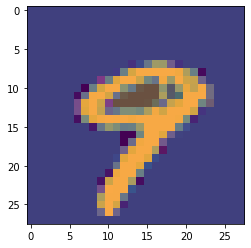

In [172]:
plt.imshow(INT_MAP[key]['image'])
# plt.show()
# plt.close
show_img(INT_MAP[key]['masks'])

In [106]:
manh_aggregated_dist = {}
for k in INT_MAP:
    for dist in INT_MAP[k]['manh_disteractions']:
        if dist not in manh_aggregated_dist:
            manh_aggregated_dist[dist] = {}
            manh_aggregated_dist[dist]['edge'] = []
            manh_aggregated_dist[dist]['in_object'] = []
            manh_aggregated_dist[dist]['not_in_object'] = []
        manh_aggregated_dist[dist]['edge'].extend(INT_MAP[k]['manh_disteractions'][dist]['edge'])
        manh_aggregated_dist[dist]['in_object'].extend(INT_MAP[k]['manh_disteractions'][dist]['non_edge']['in_object'])
        manh_aggregated_dist[dist]['not_in_object'].extend(INT_MAP[k]['manh_disteractions'][dist]['non_edge']['not_in_object'])

In [135]:
eucl_aggregated_dist = {}
for k in INT_MAP:
    for dist in INT_MAP[k]['eucl_disteractions']:
        if dist not in eucl_aggregated_dist:
            eucl_aggregated_dist[dist] = {}
            eucl_aggregated_dist[dist]['edge'] = []
            eucl_aggregated_dist[dist]['in_object'] = []
            eucl_aggregated_dist[dist]['not_in_object'] = []
        eucl_aggregated_dist[dist]['edge'].extend(INT_MAP[k]['eucl_disteractions'][dist]['edge'])
        eucl_aggregated_dist[dist]['in_object'].extend(INT_MAP[k]['eucl_disteractions'][dist]['non_edge']['in_object'])
        eucl_aggregated_dist[dist]['not_in_object'].extend(INT_MAP[k]['eucl_disteractions'][dist]['non_edge']['not_in_object'])

In [101]:
import pandas as pd

In [152]:
ovr_dfs = []
for dist in manh_aggregated_dist:
    dfs = [pd.DataFrame({'dist':dist,'value': values, 'key': key}) for key, values in manh_aggregated_dist[dist].items()]
    ovr_dfs.extend(dfs)
    
df_long = pd.concat(ovr_dfs,ignore_index=True)

In [153]:
df_long['dist'].value_counts().reset_index().sort_values('index').head(60)

,index,dist
26,1,3243
22,2,7731
20,3,12858
18,4,18171
15,5,24952
13,6,31648
10,7,37579
8,8,42830
6,9,47143
3,10,51936


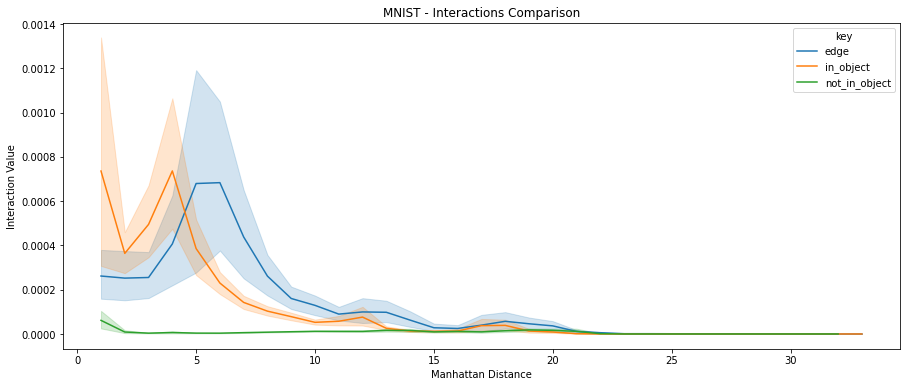

In [132]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df_long, y='value', x='dist', hue='key')
plt.xlabel("Manhattan Distance")
plt.ylabel("Interaction Value")
plt.title("MNIST - Interactions Comparison")
plt.show();

In [144]:
ovr_dfs = []
for dist in eucl_aggregated_dist:
    dfs = [pd.DataFrame({'dist':dist,'value': values, 'key': key}) for key, values in eucl_aggregated_dist[dist].items()]
    ovr_dfs.extend(dfs)
    
df_long = pd.concat(ovr_dfs,ignore_index=True)

In [151]:
df_long['dist'].value_counts().reset_index().sort_values('index').head(60)

,index,dist
15,1.000000,3243
35,1.414214,1663
25,2.000000,2248
3,2.236068,5587
52,2.828427,1092
39,3.000000,1539
5,3.162278,4619
9,3.605551,4075
50,4.000000,1209
8,4.123106,4137


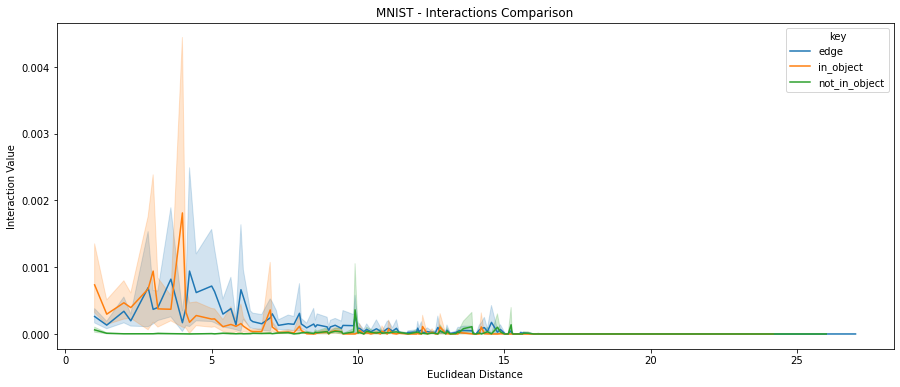

In [145]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df_long, y='value', x='dist', hue='key')
plt.xlabel("Euclidean Distance")
plt.ylabel("Interaction Value")
plt.title("MNIST - Interactions Comparison")
plt.show();

### CIFAR

In [176]:
!ls output/cifar/w_phi/

interactions_cifar_test_0.pickle  interactions_cifar_test_3.pickle
interactions_cifar_test_1.pickle  interactions_cifar_test_4.pickle
interactions_cifar_test_10.pickle interactions_cifar_test_5.pickle
interactions_cifar_test_11.pickle interactions_cifar_test_6.pickle
interactions_cifar_test_12.pickle interactions_cifar_test_7.pickle
interactions_cifar_test_13.pickle interactions_cifar_test_8.pickle
interactions_cifar_test_14.pickle interactions_cifar_test_9.pickle
interactions_cifar_test_2.pickle


In [177]:
IMG_DIR = 'output/cifar/w_phi/'
IMG_SET = 'cifar'

In [178]:
sorted(os.listdir(IMG_DIR))

['interactions_cifar_test_0.pickle',
 'interactions_cifar_test_1.pickle',
 'interactions_cifar_test_10.pickle',
 'interactions_cifar_test_11.pickle',
 'interactions_cifar_test_12.pickle',
 'interactions_cifar_test_13.pickle',
 'interactions_cifar_test_14.pickle',
 'interactions_cifar_test_2.pickle',
 'interactions_cifar_test_3.pickle',
 'interactions_cifar_test_4.pickle',
 'interactions_cifar_test_5.pickle',
 'interactions_cifar_test_6.pickle',
 'interactions_cifar_test_7.pickle',
 'interactions_cifar_test_8.pickle',
 'interactions_cifar_test_9.pickle']

In [180]:
dataset = load_dataset('cifar100', split="test")
H,W, _ = np.array(dataset[0]['img']).shape

Found cached dataset cifar100 (/Users/andrejerkelens/.cache/huggingface/datasets/cifar100/cifar100/1.0.0/f365c8b725c23e8f0f8d725c3641234d9331cd2f62919d1381d1baa5b3ba3142)


Found cached dataset cifar100 (/Users/andrejerkelens/.cache/huggingface/datasets/cifar100/cifar100/1.0.0/f365c8b725c23e8f0f8d725c3641234d9331cd2f62919d1381d1baa5b3ba3142)


Begin image: 0
Mask generation time: 32.65018770901952 seconds
Edge finder time: 0.002994542010128498 seconds
Matching pixels time: 2.564139999973122 seconds
Edge interaction calculator time: 0.18431762501131743 seconds
Neighbor calculation time: 0.01229300000704825 seconds
Surrounding interactions time: 0.012056790990754962 seconds
Heatmap generation time: 0.024941375013440847 seconds
Distance interaction calculation time: 0.5632516669575125 seconds
Begin image: 1
Mask generation time: 31.628302624973003 seconds
Edge finder time: 0.004666166030801833 seconds
Matching pixels time: 7.691127291996963 seconds
Edge interaction calculator time: 0.19840304198442027 seconds
Neighbor calculation time: 0.021377708995714784 seconds
Surrounding interactions time: 0.012799791991710663 seconds
Heatmap generation time: 0.020205000007990748 seconds
Distance interaction calculation time: 0.9847598749911413 seconds
Begin image: 2
Mask generation time: 31.209199125005398 seconds
Edge finder time: 0.0046

/var/folders/nq/ydw8sbmd0492r2npkdsbqqvc0000gn/T/ipykernel_47680/100099932.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  reg_fig = plt.figure(figsize=(8,8))


Heatmap generation time: 0.02242624998325482 seconds
Distance interaction calculation time: 0.7774295840063132 seconds
Begin image: 11
Mask generation time: 31.962866125046276 seconds
Edge finder time: 0.01231349998852238 seconds
Matching pixels time: 47.74876837502234 seconds
Edge interaction calculator time: 0.16146675002528355 seconds
Neighbor calculation time: 0.016769834037404507 seconds
Surrounding interactions time: 0.01124245801474899 seconds
Heatmap generation time: 0.018225458974484354 seconds
Distance interaction calculation time: 9.46214062499348 seconds
Begin image: 12
Mask generation time: 32.37683783296961 seconds
Edge finder time: 0.006645083019975573 seconds
Matching pixels time: 10.68158841697732 seconds
Edge interaction calculator time: 0.21141062496462837 seconds
Neighbor calculation time: 0.02784354198956862 seconds
Surrounding interactions time: 0.012508167012128979 seconds
Heatmap generation time: 0.01778958400245756 seconds
Distance interaction calculation time:

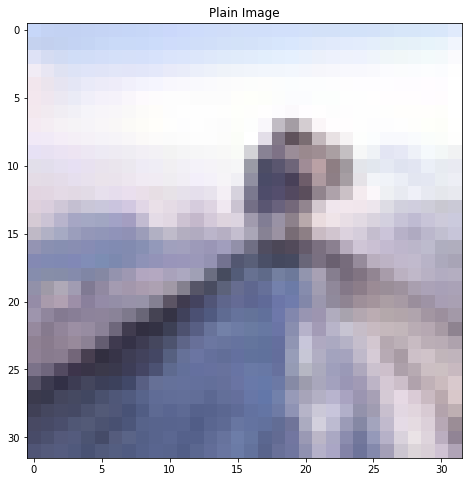

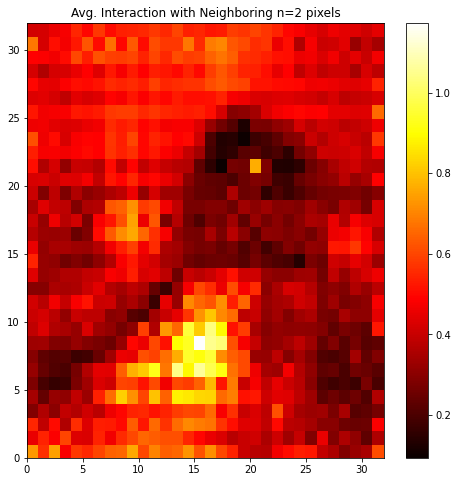

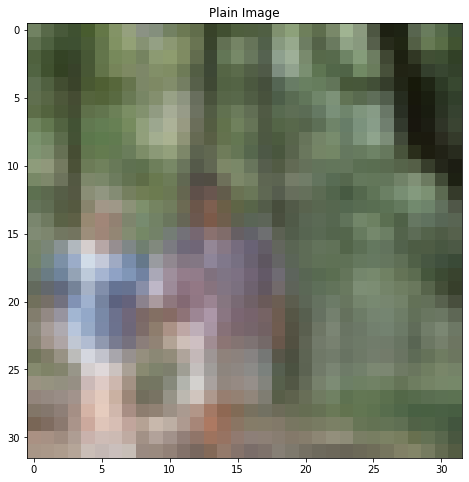

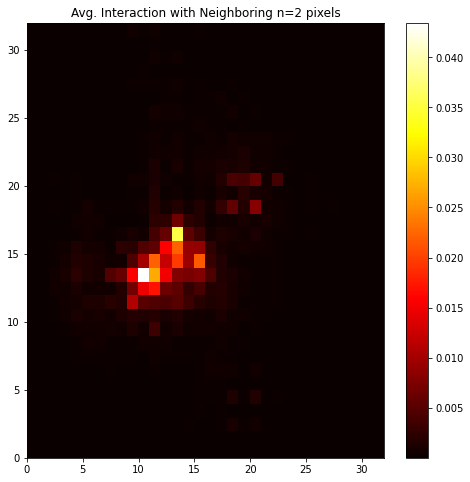

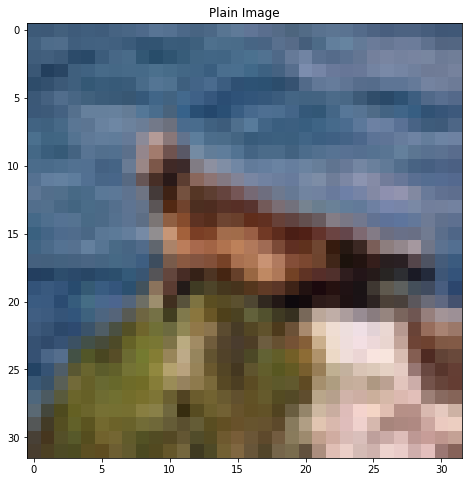

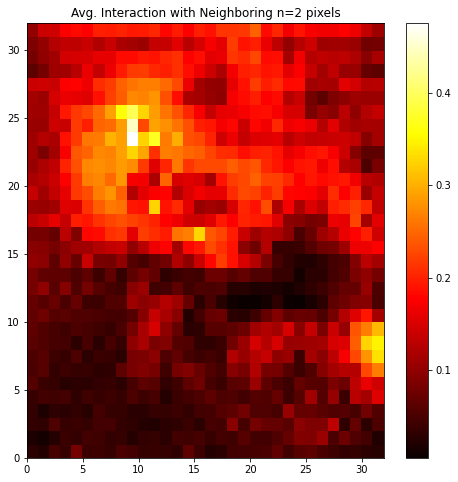

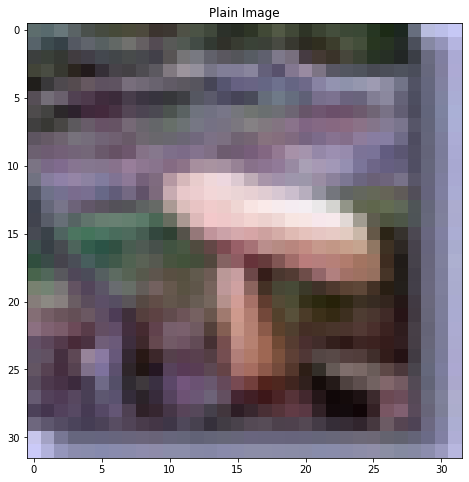

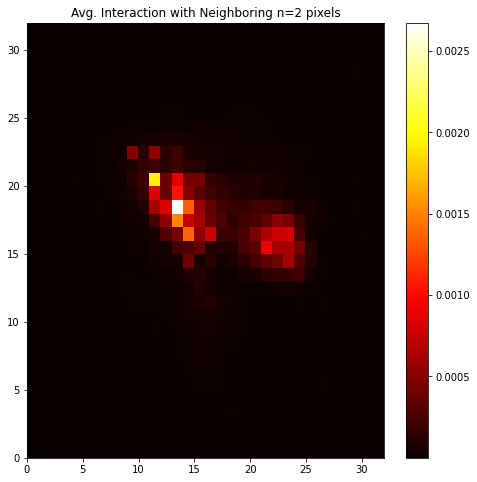

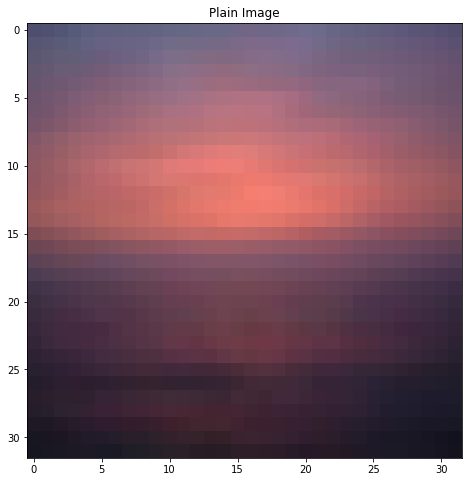

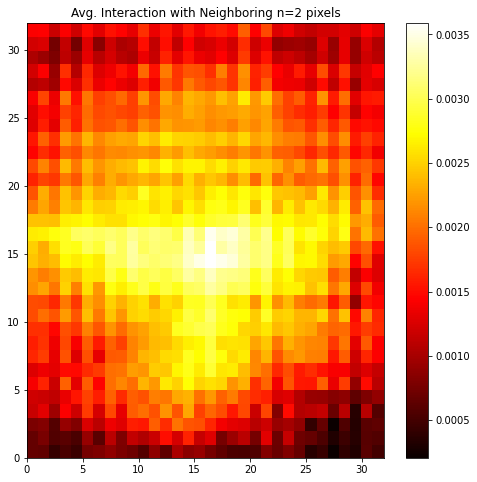

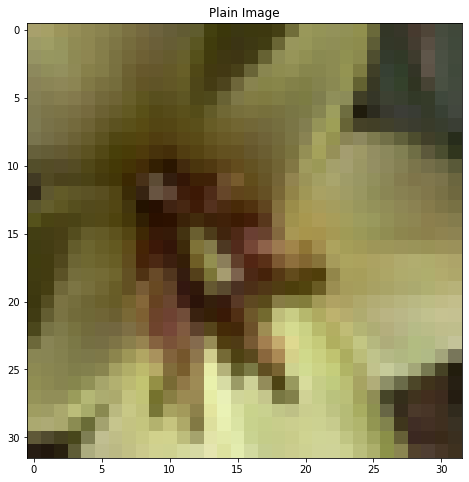

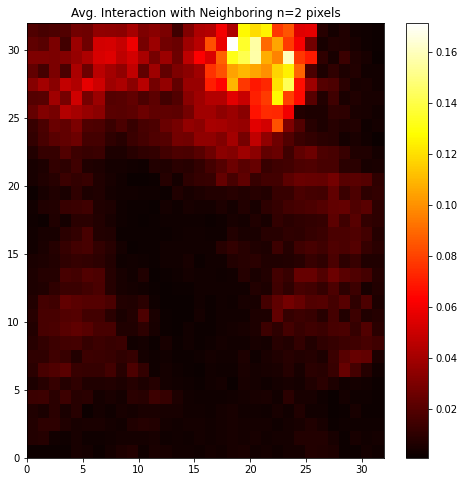

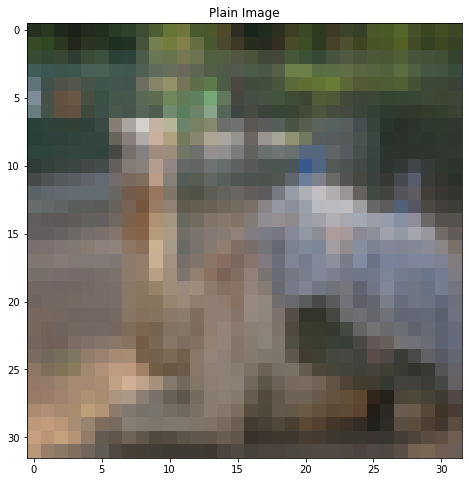

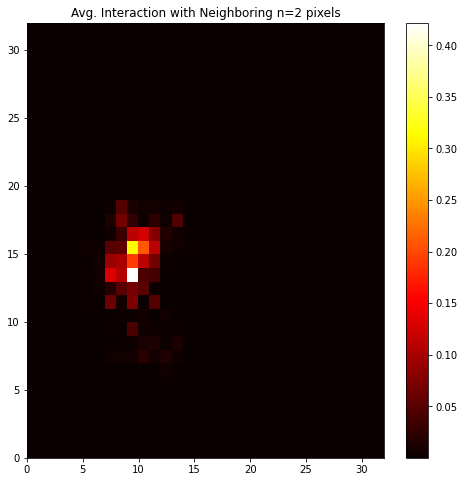

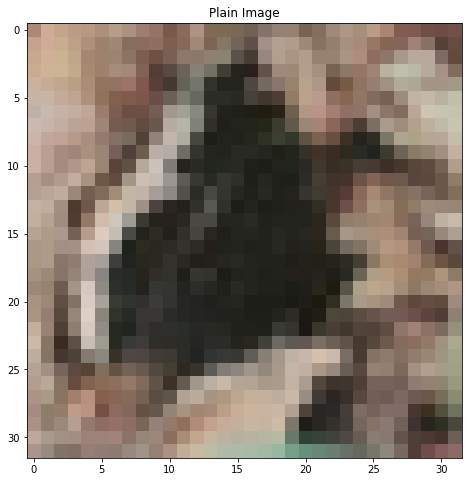

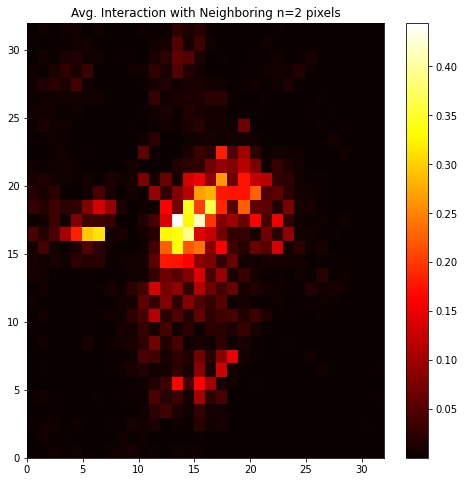

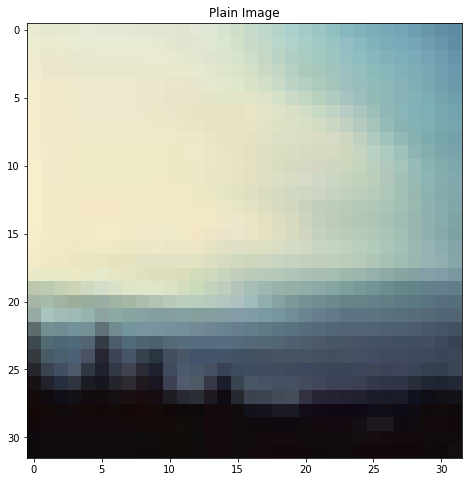

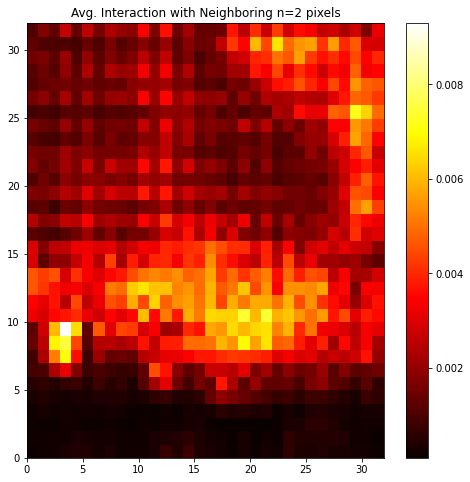

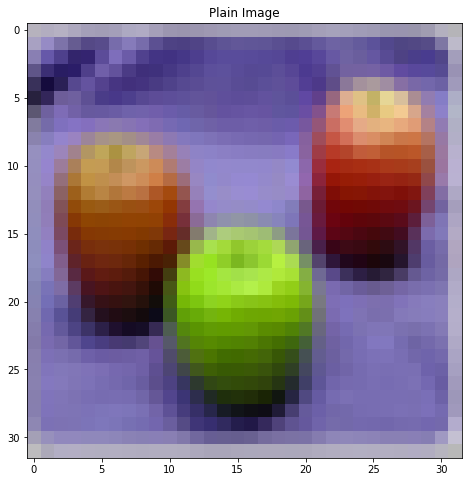

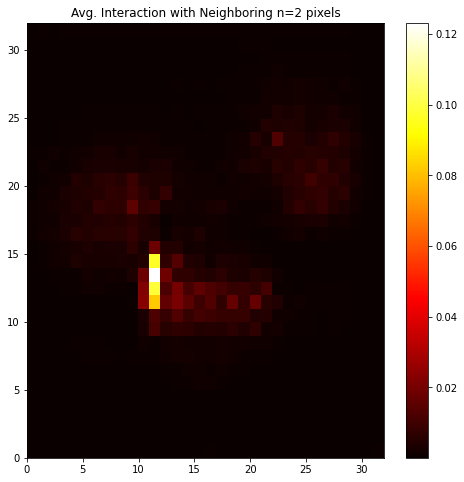

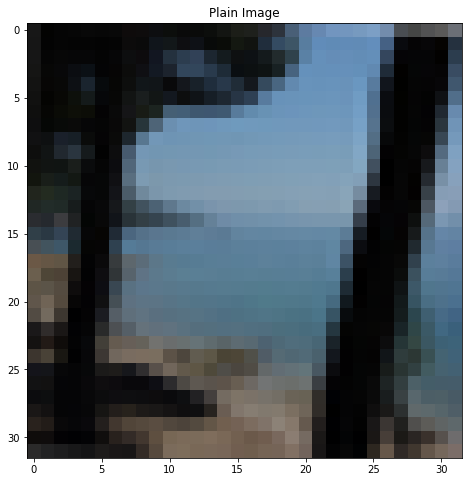

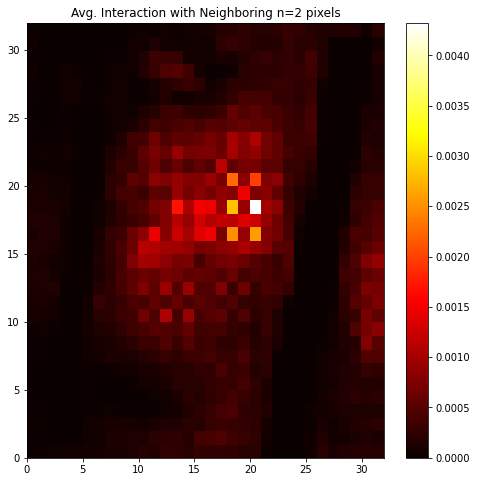

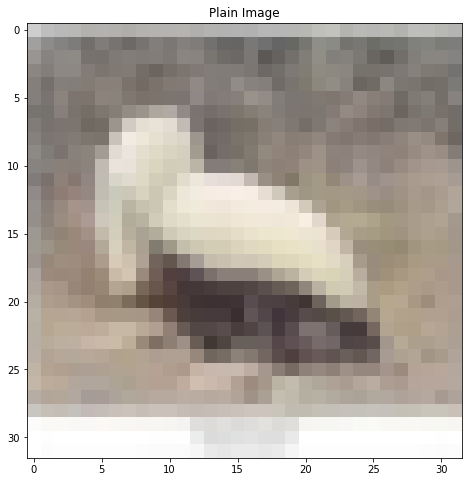

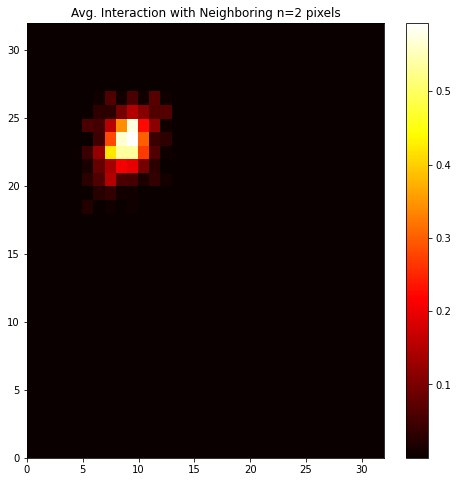

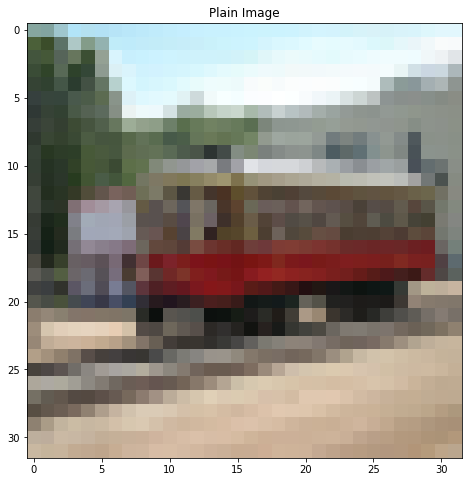

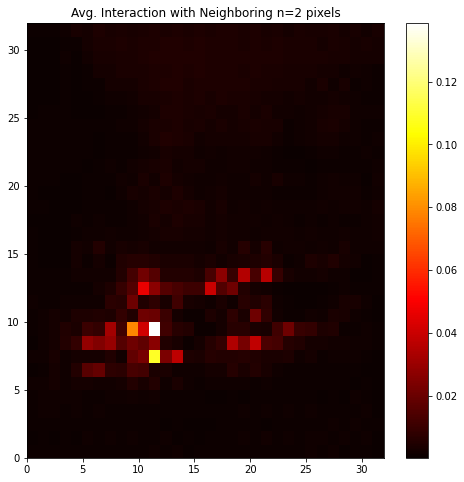

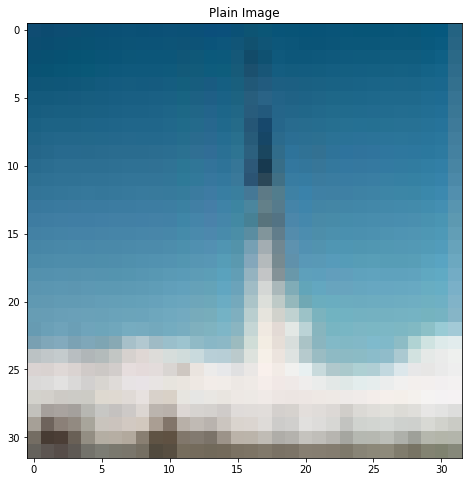

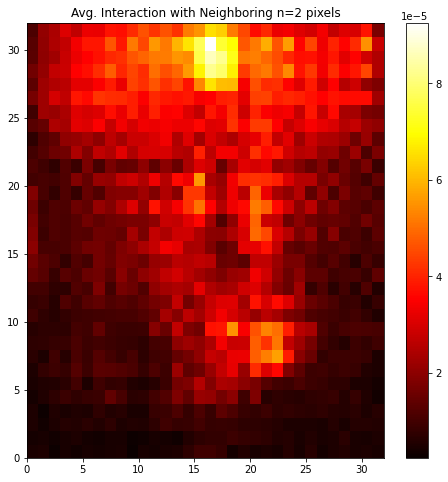

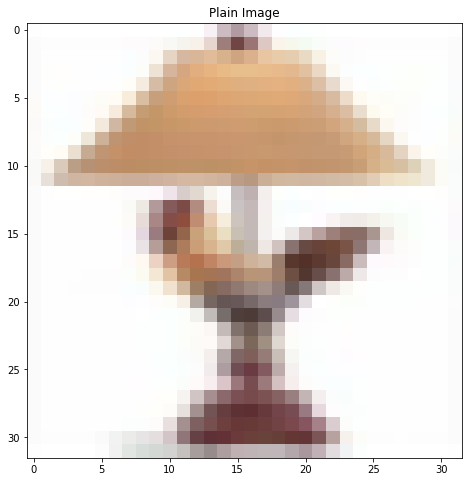

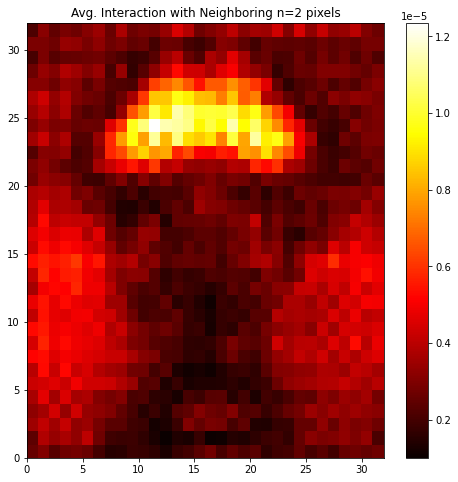

In [269]:
# Load the interactions from the pickle file
# Images are presumed to be in order, introduce more complex mapping if needed
INT_MAP = {}
NEIGHBORHOOD_SIZE = 2

for pickint in sorted(os.listdir(IMG_DIR), key=lambda x: int(x.split('_')[-1].split('.')[0])):
    INT_MAP[pickint] = {}
    path = os.path.join(IMG_DIR, pickint)
    with open(path , "rb") as f:
        INT_MAP[pickint]['interactions'] = pickle.load(f)
        

if IMG_SET == 'mnist':
    dataset = load_dataset('mnist', split='test')
    H,W = np.array(dataset[0]["image"]).shape
elif IMG_SET == 'cifar':
    dataset = load_dataset('cifar100', split="test")
    H,W, _ = np.array(dataset[0]['img']).shape



for idx, key in enumerate(INT_MAP):
    
    if IMG_SET == 'mnist':
        INT_MAP[key]['image'] = np.array(dataset[idx]["image"])
    elif IMG_SET == 'cifar':
        INT_MAP[key]['image'] = np.array(dataset[idx]['img'])

    print(f"Begin image: {idx}")
    step = perf_counter()
    if IMG_SET == "mnist":
        INT_MAP[key]['masks'] = mask_generator.generate(cv2.cvtColor(INT_MAP[key]['image'], cv2.COLOR_GRAY2RGB))
    else:
        INT_MAP[key]["masks"] = mask_generator.generate(INT_MAP[key]["image"])

    # Set Backgrounds
    bg = np.ones((32, 32), dtype=bool)
    for mask in INT_MAP[key]['masks']:
        bg = np.where(bg, ~mask['segmentation'], False)

    INT_MAP[key]['background'] = bg

    print(f"Mask generation time: {perf_counter() - step} seconds")
    step = perf_counter()
    _edges = []
    for mask in INT_MAP[key]['masks']:
        mask['edges'] = find_edges(mask['segmentation'])
        _edges.append(mask['edges'])
    _edges = [e for m in _edges for e in m]

    print(f"Edge finder time: {perf_counter() - step} seconds")
    step = perf_counter()

    INT_MAP[key]['edges'] = _edges

    _matching_keys = []
    for k in INT_MAP[key]['interactions']:
        for edge in _edges:
            if edge in k:
                _matching_keys.append(k)


    _matching_keys = set(_matching_keys)
    print(f"Matching pixels time: {perf_counter() - step} seconds")
    step = perf_counter()


    INT_MAP[key]["avg_non_edge_interaction"] = np.array([INT_MAP[key]['interactions'][v] for v in INT_MAP[key]['interactions'] if v not in _matching_keys]).mean()
    INT_MAP[key]["avg_edge_interaction"] = np.array([INT_MAP[key]['interactions'][v] for v in _matching_keys]).mean()

    print(f"Edge interaction calculator time: {perf_counter() - step} seconds")
    step = perf_counter()

    
    ALL_NEIGHBORS = get_neighbors(H, W, NEIGHBORHOOD_SIZE)
    print(f"Neighbor calculation time: {perf_counter() - step} seconds")
    step = perf_counter()
    S_INTERACTIONS = get_surrounding_interactions(H, W, ALL_NEIGHBORS, INT_MAP[key]['interactions'])
    print(f"Surrounding interactions time: {perf_counter() - step} seconds")
    step = perf_counter()
    reg_fig, heatmap = get_heatmap(INT_MAP[key]['image'], S_INTERACTIONS, NEIGHBORHOOD_SIZE)
    print(f"Heatmap generation time: {perf_counter() - step} seconds")
    step = perf_counter()

    INT_MAP[key]['figure'] = reg_fig
    INT_MAP[key]['heatmap'] = heatmap

    INT_MAP[key]["eucl_disteractions"] = get_distance_interactions(INT_MAP[key]["masks"], INT_MAP[key]['background'], INT_MAP[key]["interactions"], INT_MAP[key]["image"], "eucl")
    INT_MAP[key]["manh_disteractions"] = get_distance_interactions(INT_MAP[key]["masks"], INT_MAP[key]['background'], INT_MAP[key]["interactions"], INT_MAP[key]["image"], "manh")

    print(f"Distance interaction calculation time: {perf_counter() - step} seconds")

In [243]:
# tb = np.ones((32, 32), dtype=bool)
# arr2 = INT_MAP['interactions_cifar_test_13.pickle']['masks'][0]['segmentation']
# art = np.where(tb, ~arr2, False)
# art2 = np.full((32, 32), False)
# np.where(art, ~art2, False)

# bg = np.ones((32, 32), dtype=bool)
# for mask in INT_MAP['interactions_cifar_test_14.pickle']['masks']:
#     bg = np.where(bg, ~mask['segmentation'], False)

# int_arr = bg.astype(int)

# # Display the image
# plt.imshow(int_arr, cmap='gray')
# plt.axis('off')  # Turn off axis numbers and ticks
# plt.show()

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

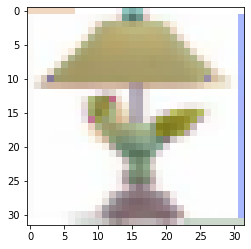

In [270]:
plt.imshow(INT_MAP['interactions_cifar_test_14.pickle']['image'])
show_img(INT_MAP['interactions_cifar_test_14.pickle']['masks'])

In [201]:
# manh_aggregated_dist = {}
# for k in INT_MAP:
#     for dist in INT_MAP[k]['manh_disteractions']:
#         if dist not in manh_aggregated_dist:
#             manh_aggregated_dist[dist] = {}
#             manh_aggregated_dist[dist]['edge_edge'] = []
#             manh_aggregated_dist[dist]['edge_object'] = []
#             manh_aggregated_dist[dist]['edge_background'] = []
#         manh_aggregated_dist[dist]['edge_edge'].extend(INT_MAP[k]['manh_disteractions'][dist]['edge'])
#         manh_aggregated_dist[dist]['edge_object'].extend(INT_MAP[k]['manh_disteractions'][dist]['non_edge']['in_object'])
#         manh_aggregated_dist[dist]['edge_background'].extend(INT_MAP[k]['manh_disteractions'][dist]['non_edge']['not_in_object'])



# eucl_aggregated_dist = {}
# for k in INT_MAP:
#     for dist in INT_MAP[k]['eucl_disteractions']:
#         if dist not in eucl_aggregated_dist:
#             eucl_aggregated_dist[dist] = {}
#             eucl_aggregated_dist[dist]['edge_edge'] = []
#             eucl_aggregated_dist[dist]['edge_object'] = []
#             eucl_aggregated_dist[dist]['edge_background'] = []
#         eucl_aggregated_dist[dist]['edge_edge'].extend(INT_MAP[k]['eucl_disteractions'][dist]['edge'])
#         eucl_aggregated_dist[dist]['edge_object'].extend(INT_MAP[k]['eucl_disteractions'][dist]['non_edge']['in_object'])
#         eucl_aggregated_dist[dist]['edge_background'].extend(INT_MAP[k]['eucl_disteractions'][dist]['non_edge']['not_in_object'])

In [ ]:
manh_aggregated_dist = {}
for k in INT_MAP:
    for dist in INT_MAP[k]['manh_disteractions']:
        if dist not in manh_aggregated_dist:
            manh_aggregated_dist[dist] = {}
            manh_aggregated_dist[dist]['edge_edge'] = []
            manh_aggregated_dist[dist]['edge_object'] = []
            manh_aggregated_dist[dist]['edge_background'] = []
        manh_aggregated_dist[dist]['edge_edge'].extend(INT_MAP[k]['manh_disteractions'][dist]['edge'])
        manh_aggregated_dist[dist]['edge_object'].extend(INT_MAP[k]['manh_disteractions'][dist]['non_edge']['in_object'])
        manh_aggregated_dist[dist]['edge_background'].extend(INT_MAP[k]['manh_disteractions'][dist]['non_edge']['not_in_object'])



eucl_aggregated_dist = {}
for k in INT_MAP:
    for dist in INT_MAP[k]['eucl_disteractions']:
        if dist not in eucl_aggregated_dist:
            eucl_aggregated_dist[dist] = {}
            eucl_aggregated_dist[dist]['edge_edge'] = []
            eucl_aggregated_dist[dist]['edge_object'] = []
            eucl_aggregated_dist[dist]['edge_background'] = []
        eucl_aggregated_dist[dist]['edge_edge'].extend(INT_MAP[k]['eucl_disteractions'][dist]['edge'])
        eucl_aggregated_dist[dist]['edge_object'].extend(INT_MAP[k]['eucl_disteractions'][dist]['non_edge']['in_object'])
        eucl_aggregated_dist[dist]['edge_background'].extend(INT_MAP[k]['eucl_disteractions'][dist]['non_edge']['not_in_object'])

In [202]:
ovr_dfs = []
for dist in manh_aggregated_dist:
    dfs = [pd.DataFrame({'dist':dist,'value': values, 'key': key}) for key, values in manh_aggregated_dist[dist].items()]
    ovr_dfs.extend(dfs)
    
df_long = pd.concat(ovr_dfs,ignore_index=True)

In [196]:
df_long.dist.value_counts().reset_index()

,index,dist
0,12,130829
1,13,130081
2,11,129318
3,14,127594
4,10,126824
5,9,120902
6,15,120718
7,8,113491
8,16,113043
9,7,104970


In [207]:
len(INT_MAP['interactions_cifar_test_14.pickle']['masks'])

46

In [208]:
INT_MAP['interactions_cifar_test_14.pickle']['masks'][0]

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'area': 150,
 'bbox': [4, 2, 22, 8],
 'predicted_iou': 0.9882684350013733,
 'point_coords': [[18.5, 8.5]],
 'stability_score': 0.9673202633857727,
 'crop_box': [0, 0, 32, 32],
 'edges': [(2, 11),
  (2, 12),
  (2, 13),
  (2, 14),
  (2, 15),
  (2, 16),
  (2, 17),
  (2, 18),
  (2, 19),
  (3, 10),
  (3, 20),
  (4, 9),
  (4, 21),
  (5, 8),
  (5, 22),
  (6, 7),
  (6, 23),
  (7, 6),
  (7, 24),
  (8, 5),
  (8, 25),
  (9, 4),
  (9, 26),
  (10, 4),
  (10, 5),
  (10, 6),
  (10, 7),
  (10, 8),
  (10, 9),
  (10, 10),
  (10, 11),
  (10, 12),
  (10, 13),
  (10, 14),
  (10, 15),
  (10, 16),
  (10, 17),
  (10, 18),
  (10, 19),
  (10, 2

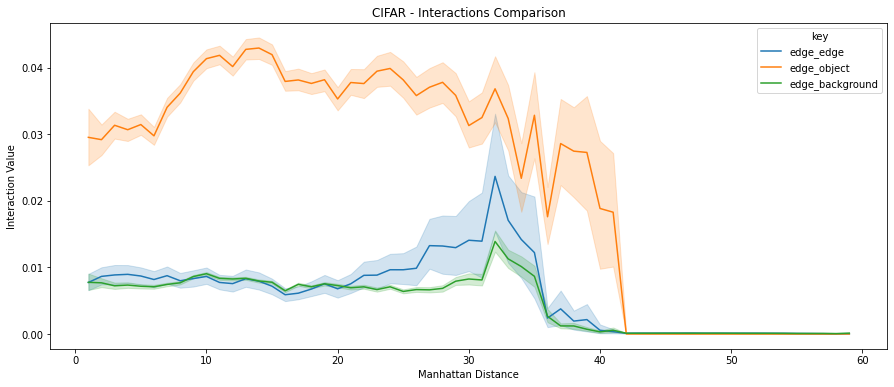

In [203]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df_long, y='value', x='dist', hue='key')
plt.xlabel("Manhattan Distance")
plt.ylabel("Interaction Value")
plt.title("CIFAR - Interactions Comparison")
plt.show();

In [209]:
ovr_dfs = []
for dist in eucl_aggregated_dist:
    dfs = [pd.DataFrame({'dist':dist,'value': values, 'key': key}) for key, values in eucl_aggregated_dist[dist].items()]
    ovr_dfs.extend(dfs)
    
df_long = pd.concat(ovr_dfs,ignore_index=True)

In [211]:
df_long

,dist,value,key
0,1.000000,0.177532,edge_edge
1,1.000000,0.207228,edge_edge
2,1.000000,0.187637,edge_edge
3,1.000000,0.266505,edge_edge
4,1.000000,0.081193,edge_edge
...,...,...,...
467179,40.459857,0.000046,edge_edge
467180,40.459857,0.000016,edge_edge
467181,41.109610,0.000042,edge_edge
467182,41.109610,0.000032,edge_edge


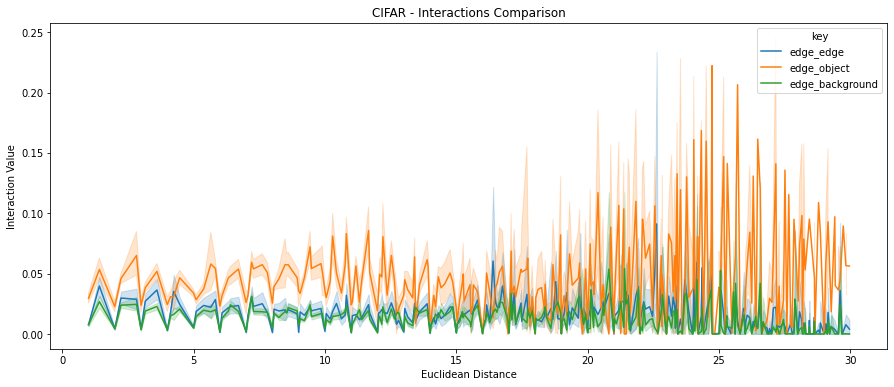

In [213]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df_long[df_long["dist"] < 30], y='value', x='dist', hue='key')
plt.xlabel("Euclidean Distance")
plt.ylabel("Interaction Value")
plt.title("CIFAR - Interactions Comparison")
plt.show();